In [21]:
#regressão utilizando um otimizador
#Definindo as bibliotecas 
import numpy as np #biblioteca necessario para trabalhar com frameworks e matrizes 
import scipy #biblioteca necessaria para obter as funções de treinamento
import matplotlib.pyplot as plt #biblioteca utilizada para construir os graficos 
from scipy.optimize import curve_fit # biblioteca necessaria para realizar a otimização deos mse 

In [22]:
#Definindo as variaveis 
idade= [18,25,47,45,26,64,37,40,24,33] #variavel independente 
salarioAnual=[15000,29000,68000,52000,32000,80000,41000,45000,26000,33000] #variavel dependente 

xData = np.array(idade) #transformando a lista em array
yData = np.array(salarioAnual) #transformando a lista array


In [23]:
#define a função a ser otimizada (regressão simples)
def equacaoLinear (x,a,b):
    return a * x + b

In [24]:
#gera os para metros iniciais para o otimizador 
parametrosIniciais = np.array([1.0,1.0])

In [25]:
#realiza os parametros iniciais atraves do erro médio quadrado (MSE)
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData,parametrosIniciais)
#parametrosOtimizados - contém os parametros de ajustes da curva 
#pcov - contém a covariancia dos parametros encontrados 

In [26]:
#realiza a previsão dos dados atraves do modelo (constroi a equação linear)
previsaoModelo = equacaoLinear(xData, *parametrosOtimizados) #utiliza a função linear com os parametros otimizados 

In [27]:
#encontra o erro absoluto 
erroAbsoluto = previsaoModelo - yData #(valor previsto - valor real)

In [28]:
#calcula o erro quadrado entre cada média 
SE = np.square(erroAbsoluto)
#calcula o MSE
MSE = np.mean(SE)
print('SE: ', SE)
print('MSE: ', MSE)

SE:  [3.43084796e+06 5.17255537e+06 1.04930869e+08 8.61684274e+06
 1.49292340e+07 3.00928309e+06 7.03065084e+06 8.31170702e+06
 4.68969962e+05 2.50959240e+07]
MSE:  18099688.400258686


In [29]:
#realiza o claculo atraves do coefiiente de determinação 
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData)) #encontra a variancia entre os dados e o vetor 
print ('Coeficiente de Determinação: ', Rsquared)

Coeficiente de Determinação:  0.94922806137547


In [30]:
#mostra os parametros da regressão
print('Y = {}X {}'.format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y = 1410.4885587765039X -8536.539225845047


Text(0, 0.5, 'Salario Anual (R$)')

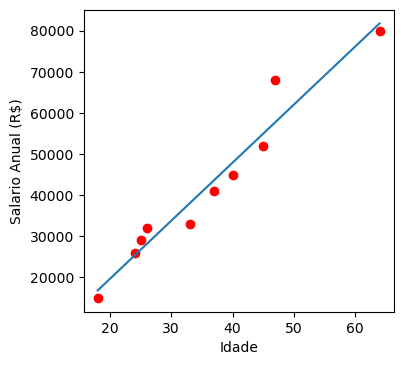

In [37]:
#realiza o plot da figura 
f = plt.figure(figsize=(4, 4), dpi=100)#indica o tamanho da figura 
axes = f.add_subplot(111) #cria objetos para o subplot

#realiza o plot dos Dados (pontos no grafico)
axes.plot(xData, yData, 'ro')

#cria os dados para serem utilizados na construção da linha (equaçao)
xModel = np.linspace(min(xData), max(xData)) #encontra os valores maximos e minimos da "Linha"
yModel = equacaoLinear(xModel, *parametrosOtimizados) #aplica a função aos parametros obtidos 

#realiza o plot da "linha"
axes.plot(xModel, yModel)
plt.xlabel("Idade")
plt.ylabel("Salario Anual (R$)")

Mesmo codigo com frameWork sklearn 

In [38]:
#utiliza a funções do sllearn para construir a regressão linear 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
reg= LinearRegression() #objeto para regressão linear 
x_ModeloSklearn=xData.reshape((-1,1)) #na regressão linear é necessario que X seja em 2d
regressao= reg.fit (x_ModeloSklearn, yData) #realiza a regressão 


In [42]:
previsao= reg.predict(x_ModeloSklearn)

In [45]:
MSE = mean_squared_error(yData, previsao) #encontra a previsão através do sklearn
print('MSE: ', MSE)

MSE:  18099688.400258683


In [48]:
#parametros encontrados 
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score #metodo para calculo do R2

R_2 = r2_score(yData, previsao) #realiza o calculo do r2 
print ("Coeficiente de determinação (R2): ", R_2)

Y = [1410.48856488]X -8536.539479099287
Coeficiente de determinação (R2):  0.94922806137547


**Regressão para um banco de dados real (mais complexo)
****

In [49]:
#regressão utilizando um BD mais complexo 
import pandas as pd 

In [51]:
hd = pd.read_csv('../input/headbrain/headbrain.csv')

In [52]:
#realiza a leitura do banco de dados 
data = pd.read_csv("../input/headbrain/headbrain.csv")
data.head()#realiza a leitura 

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [59]:
#como o formato dos dados em cada uma das colunas do dataframe são series é necessario converte em array
x=data["Head Size(cm^3)"].values
y=data["Brain Weight(grams)"].values

In [61]:
#realiza a construção do modelo de regressão 
reg= LinearRegression()
x_Reshaped=x.reshape((-1,1)) #coloca os dados em formato 2d
regressão= reg.fit (x_Reshaped, y) #encontra os coeficientes (realiza a regressão)


In [62]:
#realiza a previsão 
previsao=reg.predict(x_Reshaped)

In [66]:
#parametros encontrados 
print ('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao) #realiza o calculo do r2 
print ("Coeficiente de determinação (R2): ", R_2)

Y = [0.26342934]X 325.5734210494428
Coeficiente de determinação (R2):  0.639311719957


AttributeError: 'Line2D' object has no property 'linewidh'

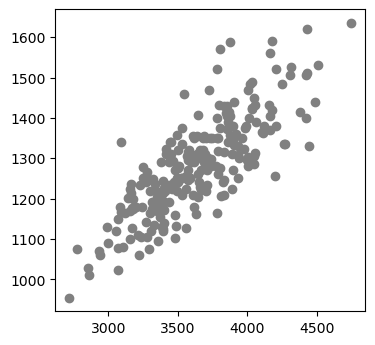

In [67]:
#realiza o plot da figura 
plt.figure(figsize=(4, 4), dpi=100)#indica o tamanho da figura
plt.scatter(x, y, color='gray')#realiza o plot do grafico de dispersão
plt.plot(x, previsao, color='red', linewidth=2)#realiza o plot da linha 
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show

